In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environmen

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [4]:
df2=df.set_index('PassengerId')
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3. Check the basic details of the dataset

In [5]:
df2.shape

(891, 11)

In [6]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


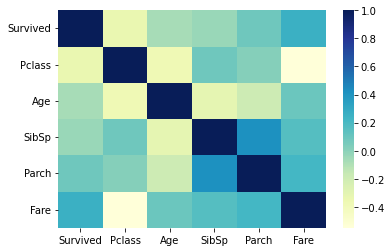

In [7]:
sns.heatmap(df2.corr(),cmap="YlGnBu")
plt.show()

In [8]:
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df2.isnull().sum().sum()

866

### Total 866 values are missing.Age - 177,Cabin - 687,Embarked - 2

In [10]:
df2['Embarked'].mode()   #Filling Missing 'Embarked' with the mode.

0    S
Name: Embarked, dtype: object

In [11]:
df2['Embarked'].fillna('S',inplace=True)

In [12]:
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### There are a lot of missing values in 'Cabin', maybe there is difference between the survival rate of people who has Cabin number and those who hasn't.So changing cabin to 1(yes) and 0(no).

In [13]:
df2.loc[df2.Cabin.notnull(),'Cabin']=1
df2.loc[df2.Cabin.isnull(),'Cabin']=0

In [14]:
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

Text(0.5, 1.0, 'Survival Rate')

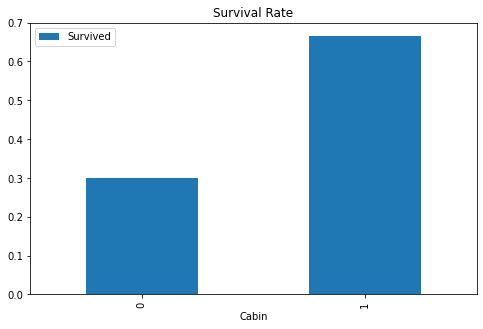

In [15]:
pd.pivot_table(df2,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

In [16]:
### We can see that survival rate is high amoung the people who had the cabin.

### Filling missing values in  Age

In [17]:
#for filling the age, need to categorise the passenges wrt to title.(eg:Master-Little boy)

In [18]:
df2['Title']=df2['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [19]:
df2.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [20]:
pd.crosstab(df2.Title,df2.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


All the 'Title' belongs to one kind of gender except for 'Dr'.In 'Dr' one is female and others are male.

In [21]:
df2[(df2.Title=='Dr')&(df2.Sex=='female')] #finding the  female 'Dr' passenger Id

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Dr


In [22]:
tit_cat={'Capt':'Man','Col':'Man','Don':'Man','Dr':'Man','Jonkheer':'Man','Lady':'Women','Major':'Man',
    'Master':'Master','Miss':'Miss','Mlle':'Women','Mme':'Women',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Women','Rev':'Mr','Sir':'Man',
    'the Countess':'Women'}

In [23]:
df2.Title=df2.Title.map(tit_cat)
df2.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


In [24]:
df2.loc[df2.index==797]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Man


In [25]:
# assign the female 'Dr' to 'Rarewoman'
df2.loc[df2.index==797,'Title']='Women'

df2.loc[df2.index==797]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Women


In [26]:
df2.Title.value_counts()

Mr        523
Miss      182
Mrs       125
Master     40
Man        14
Women       7
Name: Title, dtype: int64

In [27]:
df2.Title.isnull().sum()

0

In [28]:
df2[df2.Title=='Master']['Sex'].value_counts()

male    40
Name: Sex, dtype: int64

In [29]:
df2[df2.Title=='Master']['Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [30]:
df2[df2.Title=='Miss']['Age'].describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [31]:
##Master' mainly stands for little boy, but we also want to find little girl.
##Because children tend to have higher survival rate.
##For the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.
##For the 'Miss' with no Age record, we use (Parch!=0).
##Since if it's a little girl, she was very likely to be accompanied by parent
##We'll create a function to filter the girls.
##The function can't be used if 'Age' is Nan, so first we fill the missing values with '567'.

In [32]:
df2.Age.isnull().sum()

177

In [42]:
df3=df2
df3['Age'].fillna(567,inplace=True)

In [43]:
df3.Age.isnull().sum()

0

In [45]:
df3.loc[df3['Age']==567]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,567.0,0,0,330877,8.4583,0,Q,Mr
18,1,2,"Williams, Mr. Charles Eugene",male,567.0,0,0,244373,13.0000,0,S,Mr
20,1,3,"Masselmani, Mrs. Fatima",female,567.0,0,0,2649,7.2250,0,C,Mrs
27,0,3,"Emir, Mr. Farred Chehab",male,567.0,0,0,2631,7.2250,0,C,Mr
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,567.0,0,0,330959,7.8792,0,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,567.0,0,0,2629,7.2292,0,C,Mr
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,567.0,8,2,CA. 2343,69.5500,0,S,Miss
869,0,3,"van Melkebeke, Mr. Philemon",male,567.0,0,0,345777,9.5000,0,S,Mr


In [46]:
def girl(title_chk):
    if (title_chk.Age!=567)&(title_chk.Title=='Miss')&(title_chk.Age<=14):
        return 'Girl'
    elif (title_chk.Age==999)&(title_chk.Title=='Miss')&(title_chk.Parch!=0):
        return 'Girl'
    else:
        return title_chk.Title

In [47]:
df3['Title']=df3.apply(girl,axis=1)

In [48]:
df3.Title.value_counts()

Mr        523
Miss      145
Mrs       125
Master     40
Girl       37
Man        14
Women       7
Name: Title, dtype: int64

In [49]:
##fill the missing 'Age' according to their 'Title'.

In [53]:
df3[df3.Age==567]['Age'].value_counts()

567.0    177
Name: Age, dtype: int64

In [54]:
Tit_repl_age=['Mr','Miss','Mrs','Master','Girl','Man','Women']
for i in Tit_repl_age:
    df3.loc[(df3.Age==567)&(df3.Title==i),'Age']=df3.loc[df3.Title==i,'Age'].median()

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [60]:
df3['Age'].describe()

count    891.000000
mean      30.484478
std       13.301153
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
##All the missing values are filled.

### 5. Check and handle outliers in at least 3 columns in the dataset

In [67]:
df4=df3

In [69]:
df4.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


Text(0.5, 1.0, 'Box plot of AGE ')

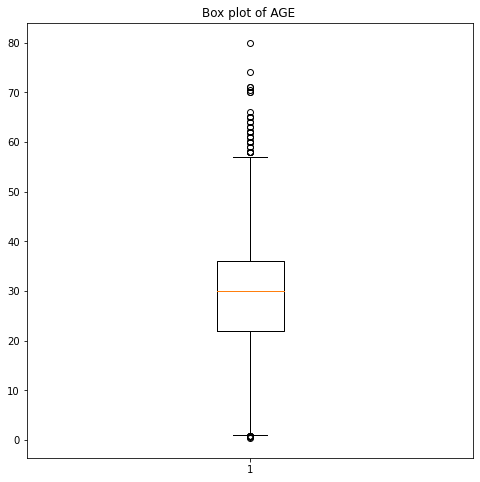

In [70]:
#Boxplot of Age
plt.figure(figsize=(8,8))
plt.boxplot(df4['Age'])
plt.title('Box plot of AGE ')

In [77]:
Q1=np.percentile(df4['Age'],25,interpolation='midpoint')
Q2=np.percentile(df4['Age'],50,interpolation='midpoint')
Q3=np.percentile(df4['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df4['Age']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  22.0
Q2 =  30.0
Q3 =  36.0

Lower limit =  1.0
Upper limit =  57.0
outlier [58.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 61.0, 58.0, 59.0, 62.0, 58.0, 63.0, 65.0, 0.92, 61.0, 60.0, 64.0, 65.0, 0.75, 63.0, 58.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 80.0, 0.75, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 0.42, 62.0, 0.83, 74.0]


In [81]:
ind1 = df4[(df4["Age"] < low_limit) | (df4["Age"] > up_limit)]
ind1['Age']

PassengerId
12     58.00
34     66.00
55     65.00
79      0.83
95     59.00
97     71.00
117    70.50
171    61.00
196    58.00
233    59.00
253    62.00
269    58.00
276    63.00
281    65.00
306     0.92
327    61.00
367    60.00
439    64.00
457    65.00
470     0.75
484    63.00
488    58.00
494    71.00
546    64.00
556    62.00
571    62.00
588    60.00
626    61.00
631    80.00
645     0.75
660    58.00
673    70.00
685    60.00
695    60.00
746    70.00
756     0.67
804     0.42
830    62.00
832     0.83
852    74.00
Name: Age, dtype: float64

In [84]:
ind1 = df4[(df4["Age"] < low_limit) | (df4["Age"] > up_limit)].index
df4.loc[ind1].index

Int64Index([ 12,  34,  55,  79,  95,  97, 117, 171, 196, 233, 253, 269, 276,
            281, 306, 327, 367, 439, 457, 470, 484, 488, 494, 546, 556, 571,
            588, 626, 631, 645, 660, 673, 685, 695, 746, 756, 804, 830, 832,
            852],
           dtype='int64', name='PassengerId')

In [85]:
df4.drop(ind1,inplace=True)
df4

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Mr
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S,Miss


Text(0.5, 1.0, 'Box plot of AGE ')

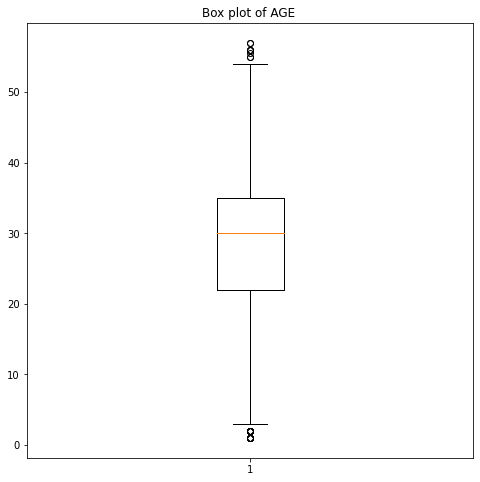

In [86]:
plt.figure(figsize=(8,8))
plt.boxplot(df4['Age'])
plt.title('Box plot of AGE ')

Text(0.5, 1.0, 'Box plot of Fare')

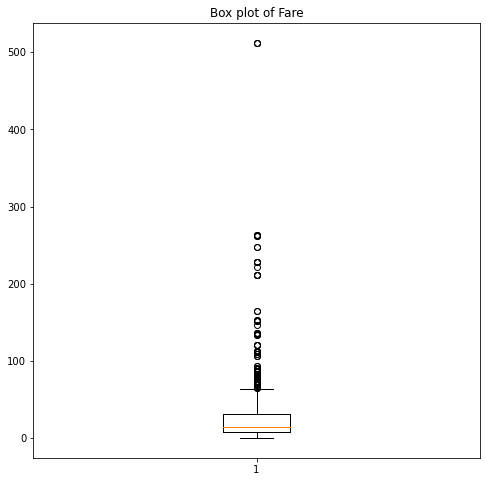

In [87]:
#Boxplot of fare
plt.figure(figsize=(8,8))
plt.boxplot(df4["Fare"])
plt.title('Box plot of Fare')

In [88]:
Q1=np.percentile(df4['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df4['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df4['Fare'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df4['Fare']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  7.8958
Q2 =  14.0
Q3 =  30.5

Lower limit =  -26.0105
Upper limit =  64.4063
outlier [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [89]:
ind1 = df4[(df4["Fare"] < low_limit) | (df4["Fare"] > up_limit)].index
df4.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            790, 793, 803, 821, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=108)

In [90]:
df4.drop(ind1,inplace=True)
df4

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr
6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,0,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Mr
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S,Miss


Text(0.5, 1.0, 'Box plot of fare ')

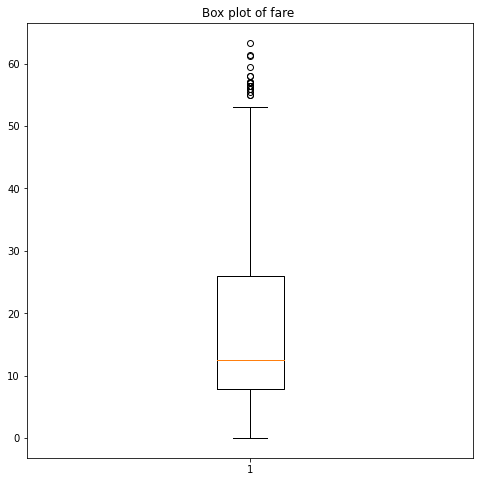

In [92]:
plt.figure(figsize=(8,8))
plt.boxplot(df4['Fare'])
plt.title('Box plot of fare ')

Text(0.5, 1.0, 'Box plot of SibSp')

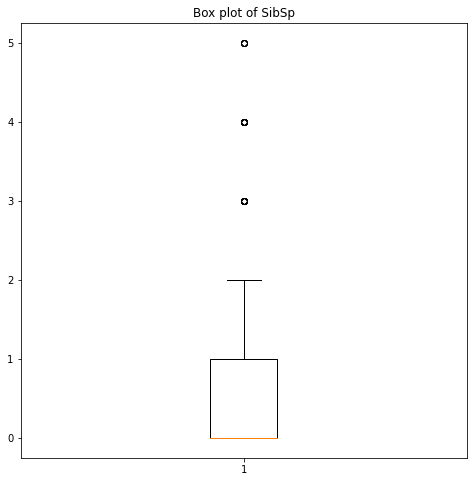

In [93]:
#outlier SibSp
plt.figure(figsize=(8,8))
plt.boxplot(df4["SibSp"])
plt.title('Box plot of SibSp')

In [94]:

Q1=np.percentile(df4['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df4['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df4['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df4['SibSp']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  0.0
Q2 =  0.0
Q3 =  1.0

Lower limit =  -1.5
Upper limit =  2.5
outlier [3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


In [97]:
ind1 = df4[(df["SibSp"] < low_limit) | (df4["SibSp"] > up_limit)].index
df4.loc[ind1].index

C:\Users\rashi\AppData\Local\Temp\ipykernel_48216\1502879883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind1 = df4[(df["SibSp"] < low_limit) | (df4["SibSp"] > up_limit)].index


Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [99]:
df4.drop(ind1,inplace=True)
df4

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr
6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,0,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Mr
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S,Miss


Text(0.5, 1.0, 'Box plot of SibSp')

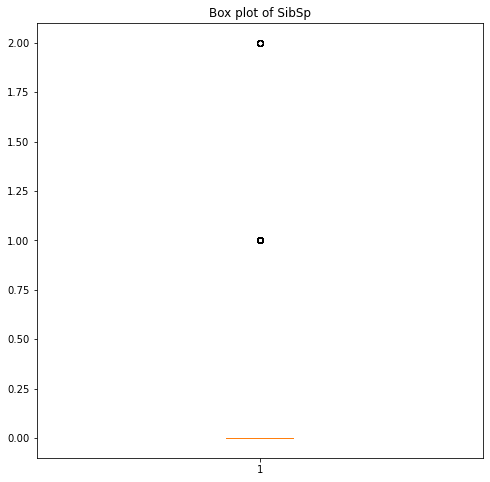

In [101]:
plt.figure(figsize=(8,8))
plt.boxplot(df4["SibSp"])
plt.title('Box plot of SibSp')

### 5)Performing the min max scaling on the feature set (Take ‘Survived’ as target)

In [120]:
X=df2.drop(["Survived","Name","Sex","Ticket","Embarked","Title","Cabin"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,35.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,30.0,1,2,23.4500


In [121]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))
X = minmax.fit_transform(X)
X=pd.DataFrame(X)
X.columns = ["Pclass","Age","SibSp","Parch","Fare"] # Giving the column names
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.375000,0.5,0.000000,0.114429
1,1.0,0.446429,0.0,0.000000,0.125082
2,0.0,0.607143,0.5,0.000000,0.838091
3,1.0,0.607143,0.0,0.000000,0.127055
4,1.0,0.607143,0.0,0.000000,0.133499
...,...,...,...,...,...
702,0.5,0.464286,0.0,0.000000,0.205182
703,0.0,0.321429,0.0,0.000000,0.473498
704,1.0,0.517857,0.5,0.333333,0.370117
705,0.0,0.446429,0.0,0.000000,0.473498


In [122]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.741160,0.517983,0.137199,0.046912,0.265450
std,0.364175,0.191654,0.251600,0.126231,0.207701
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392857,0.000000,0.000000,0.124359
50%,1.000000,0.517857,0.000000,0.000000,0.175720
75%,1.000000,0.607143,0.000000,0.000000,0.381166
max,1.000000,1.000000,1.000000,1.000000,1.000000
